In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
df = pd.read_csv(r'train.csv')

In [87]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape


(891, 12)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [93]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [28]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [92]:
df.dropna(subset=['Embarked'], inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [43]:
df.groupby('Sex').Age.mean()

Sex
female    27.745174
male      30.726645
Name: Age, dtype: float64

In [122]:
df1 = df.query('Sex == "male"').fillna(30.7)

In [120]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [129]:
df2 = df.query('Sex == "female"').fillna(27.8)

In [131]:
df2.shape

(312, 12)

In [132]:
df.shape

(889, 12)

In [155]:
df = df1.merge(df2,how='outer')

In [140]:
df.groupby('Sex').Age.mean()

Sex
female    27.754487
male      30.720919
Name: Age, dtype: float64

In [149]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,30.7,S
1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,30.7,S
2,6,0,3,"Moran, Mr. James",male,30.7,0,0,330877,8.4583,30.7,Q
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
4,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,30.7,S


In [156]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,30.7,S
1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,30.7,S
2,6,0,3,"Moran, Mr. James",male,30.7,0,0,330877,8.4583,30.7,Q
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
4,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,30.7,S


In [177]:
X = df.drop(['Survived', 'PassengerId', 'Name', 'Cabin', 'Ticket'],axis=1)


In [178]:
X = pd.get_dummies(X,drop_first=True)

In [185]:
y = df.Survived

In [187]:
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [180]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,3,35.0,0,0,8.0500,1,0,1
2,3,30.7,0,0,8.4583,1,1,0
3,1,54.0,0,0,51.8625,1,0,1
4,3,2.0,3,1,21.0750,1,0,1


# DecisionTreeClassifier

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [198]:
X_train.shape

(622, 8)

In [211]:
params_gs = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(1,20)
            ,'min_samples_split' : range(2,100,10),'min_samples_leaf' : range(1,100,10)}

In [212]:
clf = DecisionTreeClassifier()

In [217]:
grid_search_cv_clf = GridSearchCV(clf, params_gs,cv=10)

In [220]:
%%time
grid_search_cv_clf.fit(X_train, y_train)

CPU times: user 1min 31s, sys: 444 ms, total: 1min 31s
Wall time: 1min 32s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 100, 10),
                         'min_samples_split': range(2, 100, 10)})

In [221]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [222]:
best_clf = grid_search_cv_clf.best_estimator_

In [223]:
best_clf.score(X_train, y_train)

0.8279742765273312

In [224]:
best_clf.score(X_test, y_test)

0.8426966292134831

In [225]:
y_pred = best_clf.predict(X_test)

In [226]:
recall_score(y_test, y_pred)

0.6666666666666666

In [227]:
precision_score(y_test, y_pred)

0.9090909090909091

In [228]:
y_pred_prob = best_clf.predict_proba(X_test)

In [229]:
y_pred_prob

array([[0.71851852, 0.28148148],
       [0.86187845, 0.13812155],
       [0.71851852, 0.28148148],
       [0.71851852, 0.28148148],
       [0.52941176, 0.47058824],
       [0.28947368, 0.71052632],
       [0.71851852, 0.28148148],
       [0.        , 1.        ],
       [0.52941176, 0.47058824],
       [0.71851852, 0.28148148],
       [0.10416667, 0.89583333],
       [0.71851852, 0.28148148],
       [1.        , 0.        ],
       [0.71851852, 0.28148148],
       [0.28947368, 0.71052632],
       [0.86187845, 0.13812155],
       [0.86187845, 0.13812155],
       [0.95      , 0.05      ],
       [0.28947368, 0.71052632],
       [0.52941176, 0.47058824],
       [0.86187845, 0.13812155],
       [0.71851852, 0.28148148],
       [0.        , 1.        ],
       [0.86187845, 0.13812155],
       [0.28947368, 0.71052632],
       [1.        , 0.        ],
       [0.86187845, 0.13812155],
       [0.95      , 0.05      ],
       [0.52941176, 0.47058824],
       [0.28947368, 0.71052632],
       [0.

In [232]:
y_pred_prob[:,1]

array([0.28148148, 0.13812155, 0.28148148, 0.28148148, 0.47058824,
       0.71052632, 0.28148148, 1.        , 0.47058824, 0.28148148,
       0.89583333, 0.28148148, 0.        , 0.28148148, 0.71052632,
       0.13812155, 0.13812155, 0.05      , 0.71052632, 0.47058824,
       0.13812155, 0.28148148, 1.        , 0.13812155, 0.71052632,
       0.        , 0.13812155, 0.05      , 0.47058824, 0.71052632,
       0.28148148, 0.13812155, 0.28148148, 0.47058824, 0.28148148,
       0.28148148, 0.28148148, 0.        , 0.        , 1.        ,
       0.13812155, 0.89583333, 0.47058824, 1.        , 0.05      ,
       0.13812155, 0.13812155, 0.28148148, 0.71052632, 0.13812155,
       0.        , 0.13812155, 0.28148148, 0.13812155, 0.05      ,
       0.28148148, 0.13812155, 0.13812155, 0.13812155, 0.13812155,
       0.05      , 0.28148148, 0.13812155, 0.13812155, 1.        ,
       0.28148148, 0.28148148, 0.        , 0.89583333, 0.13812155,
       0.89583333, 0.28148148, 0.13812155, 1.        , 0.13812

In [233]:
pd.Series(y_pred_prob[:,1]).unique()

array([0.28148148, 0.13812155, 0.47058824, 0.71052632, 1.        ,
       0.89583333, 0.        , 0.05      ])

<AxesSubplot:>

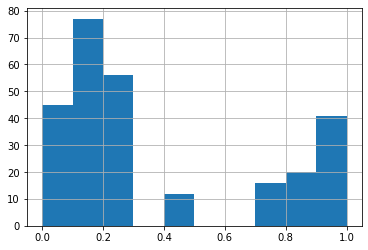

In [234]:
pd.Series(y_pred_prob[:,1]).hist()

In [239]:
y_pred = np.where(y_pred_prob[:,1] > 0.2, 1, 0)

<AxesSubplot:>

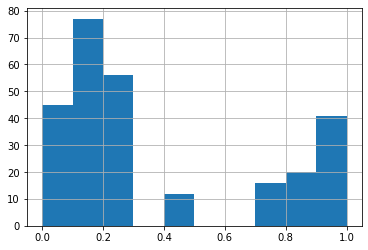

In [238]:
pd.Series(y_pred_prob[:,1]).hist()

In [241]:
recall_score(y_test, y_pred)

0.8857142857142857

In [242]:
precision_score(y_test, y_pred)

0.6413793103448275

In [243]:
y_pred = np.where(y_pred_prob[:,1] > 0.8, 1, 0)

In [244]:
recall_score(y_test, y_pred)

0.5619047619047619

In [245]:
precision_score(y_test, y_pred)

0.9672131147540983

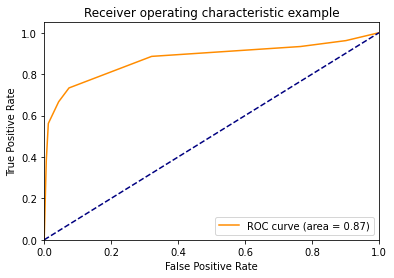

In [246]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [248]:
params_randsearch = {'criterion' : ['gini', 'entropy']
                    ,'max_depth' : range(1,20), 'min_samples_split' : range(2,100)
                    , 'min_samples_leaf' : range(1,100)}

In [249]:
random_search_cv_clf = RandomizedSearchCV(clf, params_randsearch, cv=10)

In [250]:
random_search_cv_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 20),
                                        'min_samples_leaf': range(1, 100),
                                        'min_samples_split': range(2, 100)})

In [251]:
best_clf_rm = random_search_cv_clf.best_estimator_

In [255]:
random_search_cv_clf.best_params_

{'min_samples_split': 81,
 'min_samples_leaf': 34,
 'max_depth': 10,
 'criterion': 'entropy'}

In [252]:
best_clf_rm.score(X_train, y_train)

0.8070739549839229

In [253]:
best_clf_rm.score(X_test, y_test)

0.8052434456928839

In [256]:
y_pred = best_clf_rm.predict(X_test)

In [257]:
recall_score(y_test, y_pred)

0.5428571428571428

In [258]:
precision_score(y_test, y_pred)

0.9344262295081968

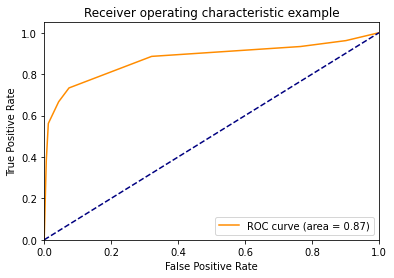

In [260]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# RandomForestClassifier

In [259]:
rdm_clf = RandomForestClassifier()

In [261]:
grid_search_cv_rdm_clf = GridSearchCV(clf, params_gs,cv=10)

In [262]:
grid_search_cv_rdm_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 100, 10),
                         'min_samples_split': range(2, 100, 10)})

In [263]:
grid_search_cv_rdm_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 12}

In [264]:
best_rdm_clf = grid_search_cv_rdm_clf.best_estimator_

In [265]:
best_rdm_clf.score(X_train, y_train)

0.8279742765273312

In [266]:
best_rdm_clf.score(X_test, y_test)

0.846441947565543

In [267]:
y_pred = best_rdm_clf.predict(X_test)

In [271]:
y_pred_prob = best_rdm_clf.predict_proba(X_test)

In [272]:
recall_score(y_test, y_pred)

0.6761904761904762

In [273]:
precision_score(y_test, y_pred)

0.9102564102564102

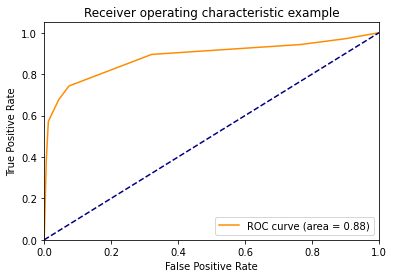

In [274]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [275]:
feature_importance = best_rdm_clf.feature_importances_

In [276]:
feature_importance

array([0.17976441, 0.12280624, 0.032059  , 0.00795899, 0.13581621,
       0.50631445, 0.        , 0.0152807 ])

In [277]:
feature_importance_df = pd.DataFrame({'features': list(X_train), 'feature_importance': feature_importance})

In [279]:
feature_importance_df.sort_values('feature_importance', ascending=False)

,features,feature_importance
5,Sex_male,0.506314
0,Pclass,0.179764
4,Fare,0.135816
1,Age,0.122806
2,SibSp,0.032059
7,Embarked_S,0.015281
3,Parch,0.007959
6,Embarked_Q,0.000000
